In [29]:
# Diwali Sales Project 

In [30]:
# We are provided with a dataset of diwali sales which contains 15 columns and 11251 rows . The given data contains customer names , 
# product id , gender , age groups and other relevant information regarding the sales . And we are supposed to drive meaningfull insights 
# by using python queries .

In [79]:
# Install numpy, pandas, seaborn, and matplotlib
%pip install numpy pandas seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [80]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [81]:
# reading the csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [82]:
# getting the basic overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [83]:
# converting the names of all columns to lowercase for convenience 
df.columns = df.columns.str.lower()

In [84]:
# description of the data in the dataset
df.describe()

,user_id,age,marital_status,orders,amount,status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [85]:
# number of rows and columns in the dataset
df.shape

(11251, 15)

In [86]:
# sample rows in the dataset (first few rows)
df.head()

,user_id,cust_name,product_id,gender,age group,age,marital_status,state,zone,occupation,product_category,orders,amount,status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [87]:
# columns in the dataset
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount', 'status', 'unnamed1'],
      dtype='object')

In [91]:
# dropping the blank columns ('Status' 'unnamed1')
df.drop(['status' , 'unnamed1'] , axis = 1 , inplace = True)

In [92]:
# checking for any null values in the dataset
pd.isnull(df).sum()

user_id              0
cust_name            0
product_id           0
gender               0
age group            0
age                  0
marital_status       0
state                0
zone                 0
occupation           0
product_category     0
orders               0
amount              12
dtype: int64

In [93]:
# dropping the null values
df.dropna(inplace = True)

In [95]:
# changing the datatype of amount column from float to int
df['amount']= df['amount'].astype('int')

In [97]:
# checking the results of the previous query
df['amount'].dtype

dtype('int64')

In [98]:
# These are the basic data cleaning and formatting functions that we have performed . Let's countinue further with Exploratory Data Analysis

In [101]:
# EXPLORATORY DATA ANALYSIS

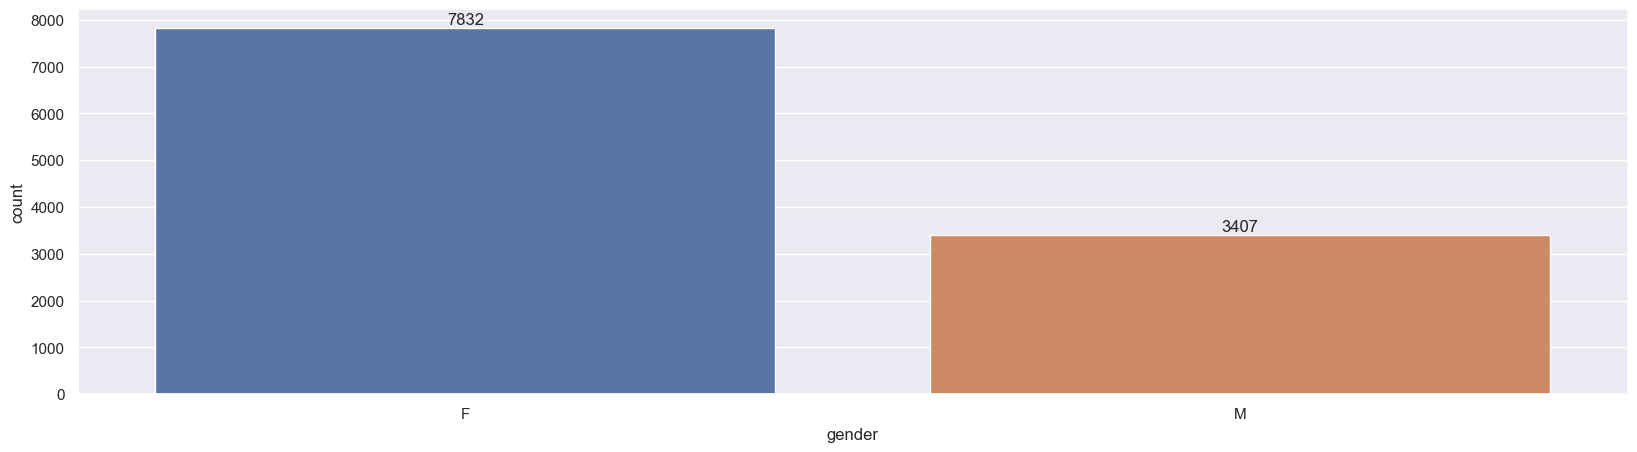

In [102]:
# plotting a bar chart for the customers on the basis of their gender and count 
ax = sns.countplot(x = 'gender', data = df)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='gender', ylabel='amount'>

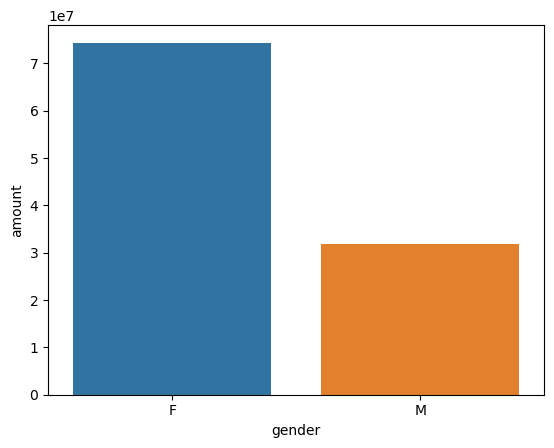

In [37]:
# plotting a bar chart for the customers on the basis of their gender and purchase amount
sales_gender = df.groupby('gender' , as_index = False)['amount'].sum().sort_values(by= 'amount', ascending = 'False'\)
sns.barplot(x = 'gender', y = 'amount', data = sales_gender)

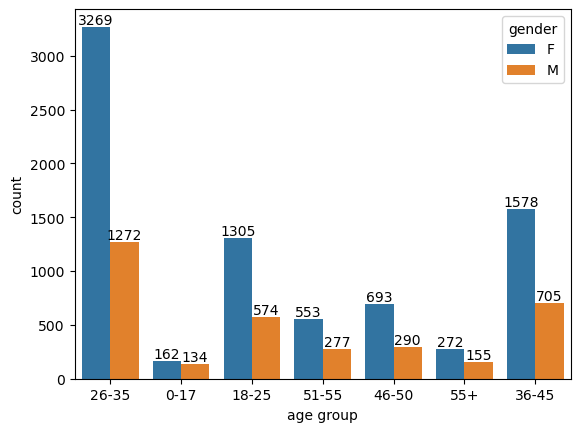

In [38]:
# plotting a bar chart for the customers on the basis of their age
ax = sns.countplot(x = 'age group' , data = df , hue = 'gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='age group', ylabel='amount'>

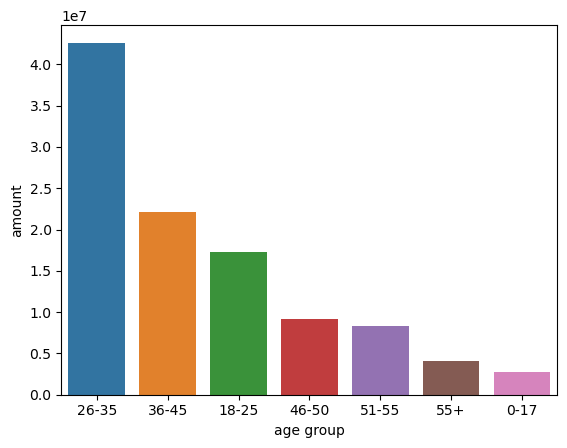

In [39]:
# plotting a bar chart for the customers on the basis of their age group and amount
sales_age = df.groupby('age group', as_index = False)['amount'].sum().sort_values(by= 'amount', ascending = False)
sns.barplot(x = 'age group', y = 'amount', data = sales_age)

<Axes: xlabel='state', ylabel='orders'>

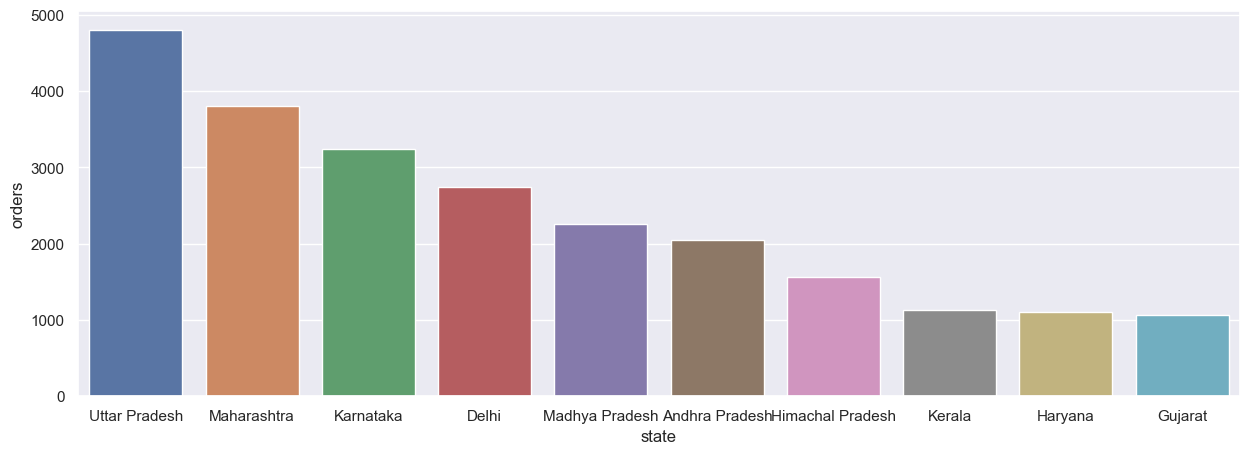

In [46]:
# total number of orders from top 10 states
state_orders = df.groupby('state', as_index = False)['orders'].sum().sort_values(by= 'orders', ascending = False).head(10)
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x = 'state', y = 'orders', data = state_orders)

<Axes: xlabel='product_id', ylabel='orders'>

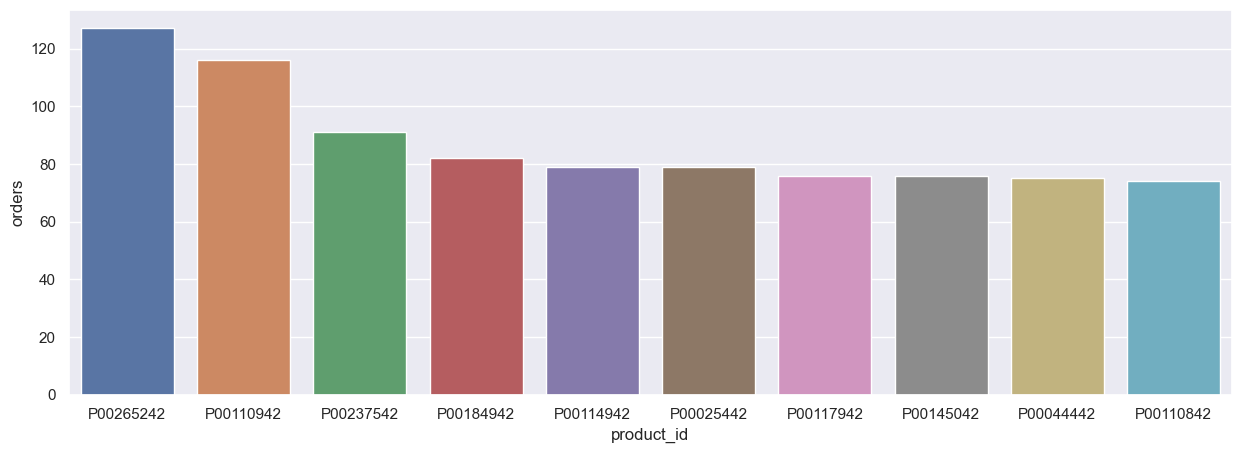

In [49]:
# top 10 products that has been sold
most_sold_products = df.groupby('product_id', as_index = False)['orders'].sum().sort_values(by = 'orders', ascending = False ).head(10)
sns.barplot(data = most_sold_products , x = 'product_id', y = 'orders')

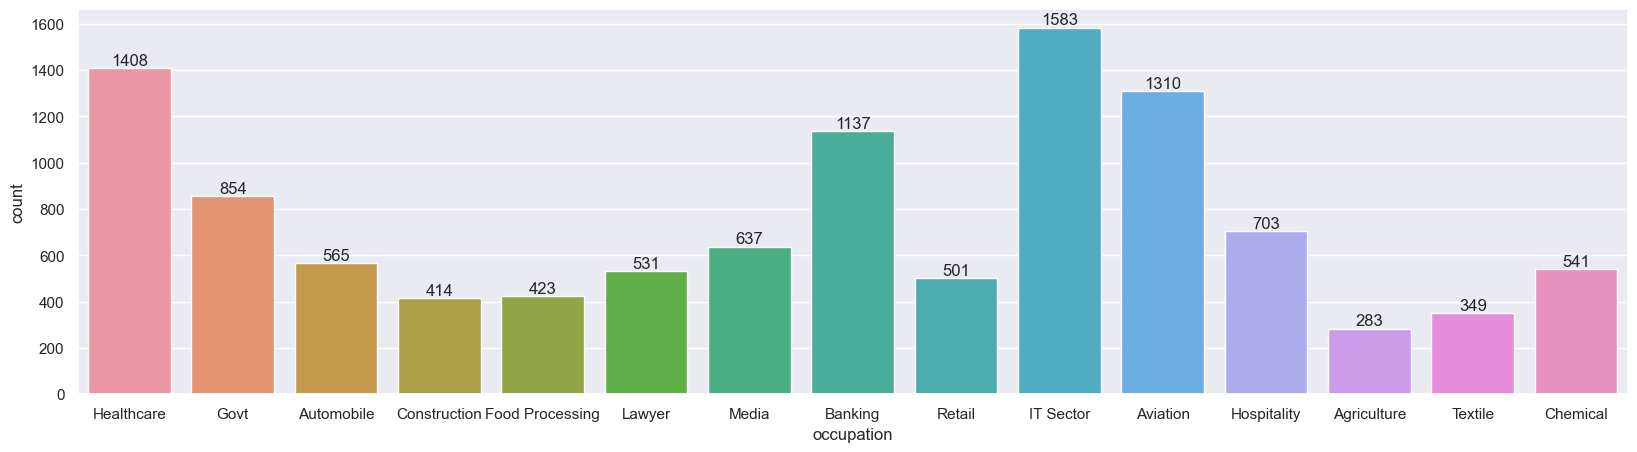

In [54]:
# plotting a bar chart for the customers on the basis of their occupation
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='occupation', ylabel='amount'>

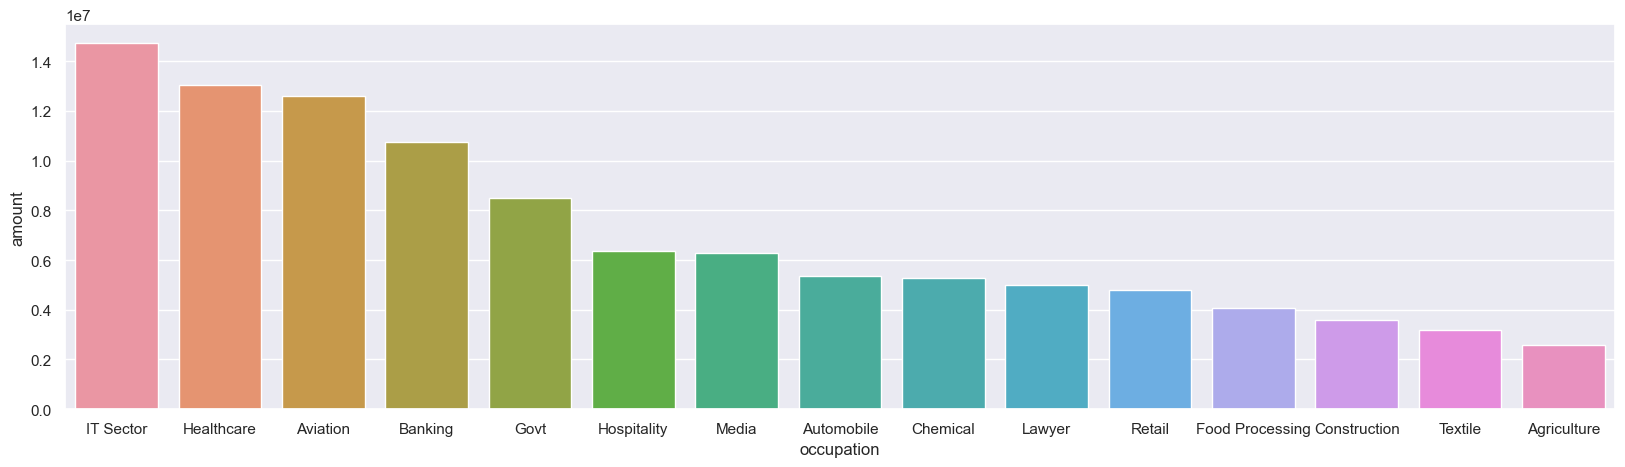

In [58]:
# plotting a bar chart for the customers on the basis of their occupation and amount they have spent
sales_state = df.groupby(['occupation'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'occupation',y= 'amount')

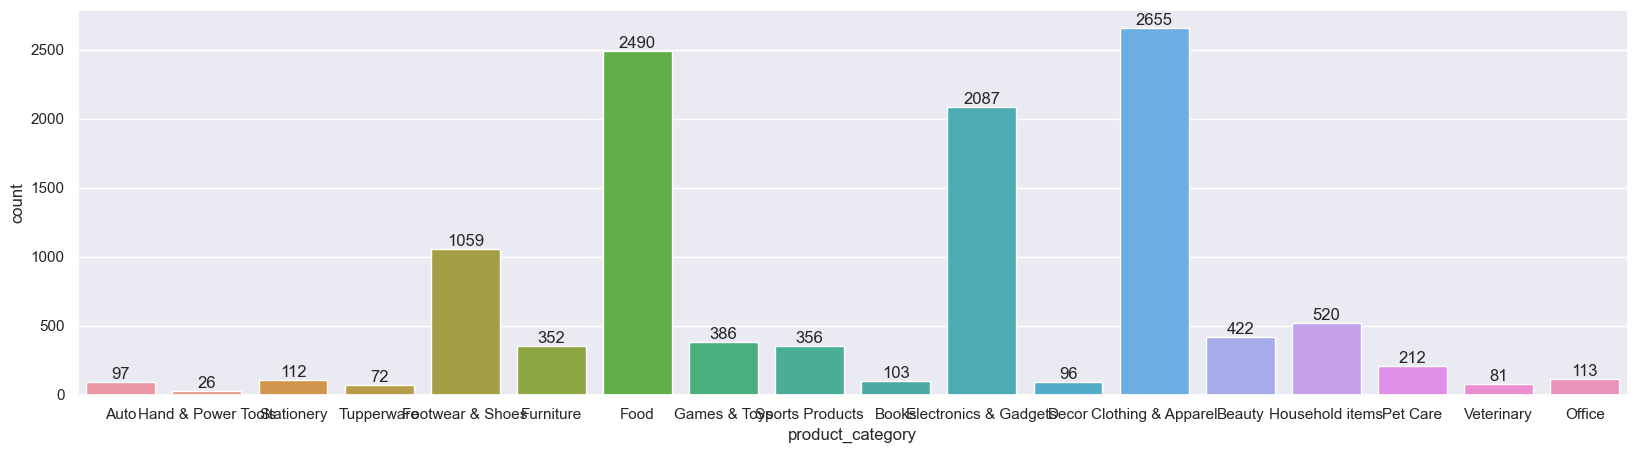

In [63]:
# plotting a bar chart on the basis of product category
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'product_category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='product_category', ylabel='amount'>

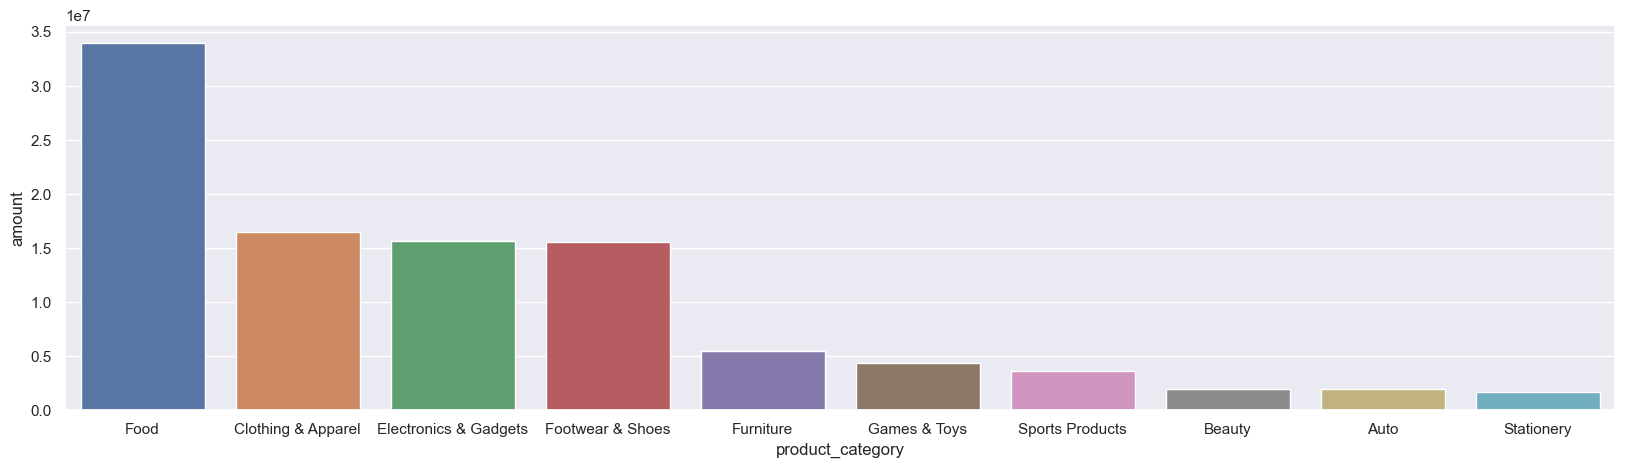

In [72]:
# plotting a bar chart on the basis of most purchased product category in terms of amount
product_category = df.groupby(['product_category'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = product_category, x = 'product_category',y= 'amount')

In [78]:
# CONCLUSION :

# Married women under age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy 
# products from Food, Clothing and Electronics category .

# Thank you!

